In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore', category=Warning)
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if str(Path.cwd().parent.parent) not in sys.path:
    sys.path.append(str(Path.cwd().parent.parent))

from utils.metrics import nmad, bias, rmse, out_frac as outf
from settings.columns import broad, narrow, wise, galex, list_feat, create_colors, create_ratio
from settings.paths import bmdn_path

In [2]:
dr3 = 'iDR3n4_DR16Q_GALEX2_unWISE2-ren.csv'
dr4 = 'STRIPE82_DR4_DR16Q1a_unWISE2a_GALEXDR672a.csv'
mags = ['broad', 'narrow', 'wise', 'galex']
configs = {'mag': False, 'col': True, 'rat': False}
feats = ['FUVmag', 'NUVmag', 'u_PStotal', 'J0378_PStotal', 'J0395_PStotal',
         'J0410_PStotal', 'J0430_PStotal', 'g_PStotal', 'J0515_PStotal', 'r_PStotal',
         'J0660_PStotal', 'i_PStotal', 'J0861_PStotal', 'z_PStotal', 'W1_MAG', 'W2_MAG']

In [3]:
def print_results(model_path, return_df=False, specz='z', photoz='zphot'):
    df = pd.read_csv(os.path.join(bmdn_path, model_path, 'Results_DF.csv'))
    cond = ((df[specz] >= 0) & (df[specz] <= 5))
    z = df[specz][cond]
    zml = df[photoz][cond]
    r = 4
    print('nmad', round(nmad(z, zml), r))
    print('rmse', round(rmse(z, zml), r))
    print('bias', round(bias(z, zml), r))
    print('outf0.15', round(outf(z, zml, 0.15), r))
    print('outf0.30', round(outf(z, zml, 0.30), r))
    print('median odds', round(np.median(df['Odds']), r))
    print('median pit', round(np.median(df['PIT']), r))
    print('median crps', round(np.median(df['CRPS']), r))
    if return_df: return df
    return

### Model tests ###

In [4]:
print_results('crossval_model_dr3_newfeatorder')

nmad 0.0544
rmse 0.454
bias 0.0216
outf0.15 0.2072
outf0.30 0.0753
median odds 0.6809
median pit 0.5237
median crps 0.0745


In [5]:
print_results('crossval_model_dr4_BNWG')

nmad 0.0468
rmse 0.4211
bias 0.0033
outf0.15 0.1889
outf0.30 0.0661
median odds 0.6967
median pit 0.5066
median crps 0.0679


In [6]:
base700 = print_results('crossval_model_dr4_BNWG_700e', True)

nmad 0.0476
rmse 0.427
bias 0.0002
outf0.15 0.187
outf0.30 0.0681
median odds 0.731
median pit 0.4798
median crps 0.0662


In [7]:
print_results('crossval_model_dr4_BNWG_800e')

nmad 0.0484
rmse 0.4237
bias 0.0021
outf0.15 0.1897
outf0.30 0.0661
median odds 0.7515
median pit 0.543
median crps 0.0662


In [8]:
print_results('crossval_model_dr4_BNWG_linux')

nmad 0.0487
rmse 0.4242
bias 0.0145
outf0.15 0.1882
outf0.30 0.0655
median odds 0.695
median pit 0.5164
median crps 0.0686


In [9]:
print_results('crossval_model_dr4_BNWG_linux_700e')

nmad 0.0476
rmse 0.4303
bias -0.0018
outf0.15 0.1927
outf0.30 0.0685
median odds 0.7217
median pit 0.4957
median crps 0.0667


In [10]:
print_results('crossval_model_dr4_BNWG_flag')

nmad 0.0481
rmse 0.4282
bias 0.0199
outf0.15 0.1879
outf0.30 0.0658
median odds 0.7017
median pit 0.5374
median crps 0.067


In [11]:
print_results('crossval_model_dr4_BWG')

nmad 0.0829
rmse 0.4479
bias 0.0154
outf0.15 0.2049
outf0.30 0.0724
median odds 0.448
median pit 0.4948
median crps 0.1074


In [19]:
print_results('crossval_model_dr4_BWG_700e')

nmad 0.0827
rmse 0.4583
bias 0.0254
outf0.15 0.2119
outf0.30 0.0743
median odds 0.4433
median pit 0.5042
median crps 0.1071


In [12]:
print_results('crossval_model_dr4_BWG_flag')

nmad 0.0825
rmse 0.4592
bias 0.0365
outf0.15 0.2072
outf0.30 0.0764
median odds 0.4479
median pit 0.5122
median crps 0.1102


### Other tests ###

In [13]:
loss = pd.read_csv(os.path.join(bmdn_path, 'final_model_dr4_BNWG_linux_700e', 'SavedModels', f'Fold0', f'Seed47_Fold0.csv'))
print(loss['loss'].argmin()+1, loss.loc[loss['loss'].argmin(), 'loss'].round(3))

699 -0.798


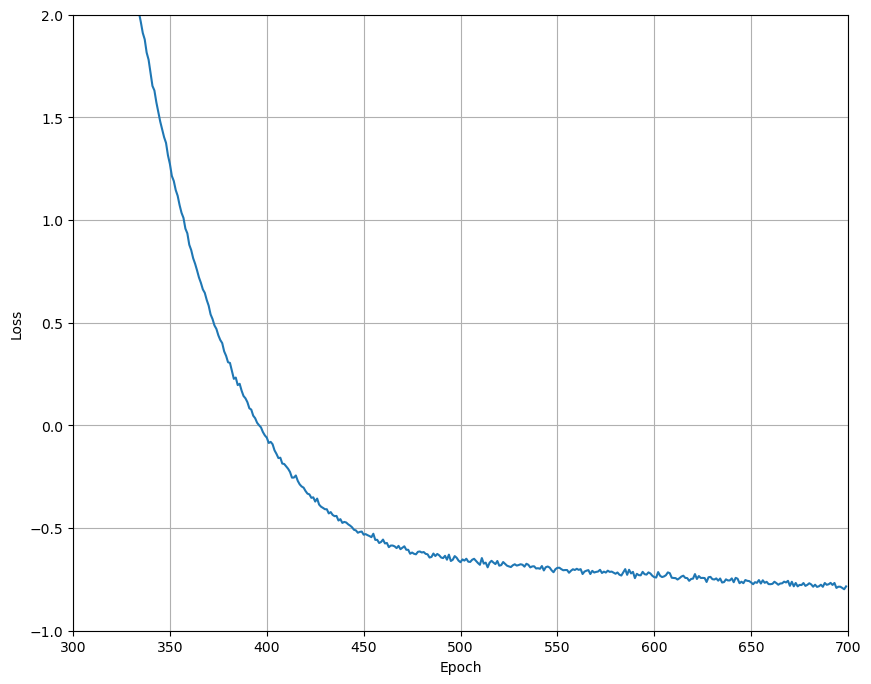

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(700)), loss['loss'])
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-1, 5))
plt.xlim(300, 700)
plt.ylim(-1, 2)
plt.show()

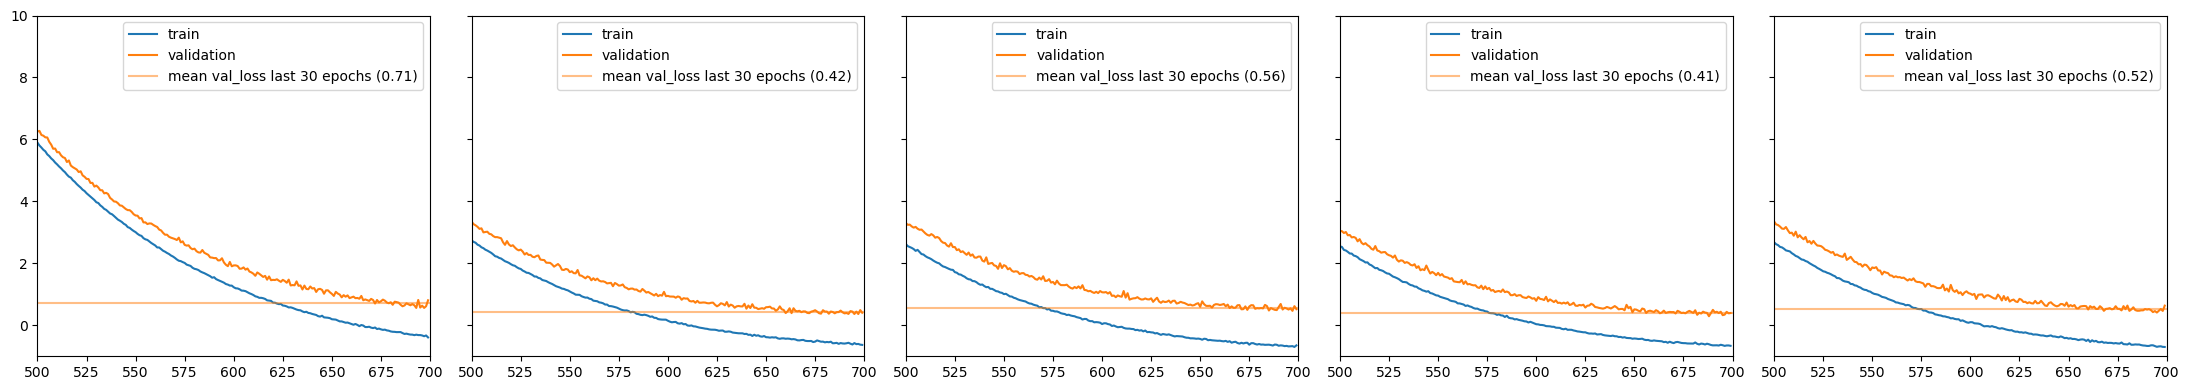

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(22, 4), sharex=True, sharey=True)
for i in range(5):
    df = pd.read_csv(os.path.join(bmdn_path, 'crossval_model_dr4_BNWG_700e', 'SavedModels', f'Fold{i}', f'Seed47_Fold{i}.csv'))
    ax[i].plot(range(len(df)), df['loss'], label='train')
    ax[i].plot(range(len(df)), df['val_loss'], label='validation')
    mean30_val_loss = df.iloc[-30:]['val_loss'].mean()
    ax[i].axhline(mean30_val_loss, c='tab:orange', alpha=0.5, label=f'mean val_loss last 30 epochs ({mean30_val_loss.round(2)})')
    ax[i].legend()
    ax[i].set_xlim(500, 700)
    ax[i].set_ylim(-1, 10)
fig.tight_layout()
plt.show()

In [16]:
for i in range(5):
    df = pd.read_csv(os.path.join(bmdn_path, 'crossval_model_dr4_BNWG', 'SavedModels', f'Fold{i}', f'Seed47_Fold{i}.csv'))
    print(df['loss'].argmin()+1, df['val_loss'].argmin()+1)
    print(df.loc[df['loss'].argmin(), 'loss'].round(2), df.loc[df['val_loss'].argmin(), 'val_loss'].round(2))

600 600
1.28 1.9
599 599
0.14 0.89
600 599
0.08 1.04
600 599
0.06 0.86
600 597
0.08 0.98


In [17]:
for i in range(5):
    df = pd.read_csv(os.path.join(bmdn_path, 'crossval_model_dr4_BNWG_700e', 'SavedModels', f'Fold{i}', f'Seed47_Fold{i}.csv'))
    print(df['loss'].argmin()+1, df['val_loss'].argmin()+1)
    print(df.loc[df['loss'].argmin(), 'loss'].round(2), df.loc[df['val_loss'].argmin(), 'val_loss'].round(2))

700 694
-0.39 0.56
700 698
-0.63 0.36
699 698
-0.7 0.47
697 689
-0.66 0.29
700 696
-0.7 0.41


In [18]:
for i in range(5):
    df = pd.read_csv(os.path.join(bmdn_path, 'crossval_model_dr4_BNWG_800e', 'SavedModels', f'Fold{i}', f'Seed47_Fold{i}.csv'))
    print(df['loss'].argmin()+1, df['val_loss'].argmin()+1)
    print(df.loc[df['loss'].argmin(), 'loss'].round(2), df.loc[df['val_loss'].argmin(), 'val_loss'].round(2))

800 782
-0.83 0.32
796 715
-0.85 0.27
800 749
-0.88 0.41
790 735
-0.83 0.29
785 722
-0.87 0.38
